In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
hay_duplicados = train.duplicated().any()
hay_duplicados

False

### MSSubClass
Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [6]:
train.MSSubClass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot: >

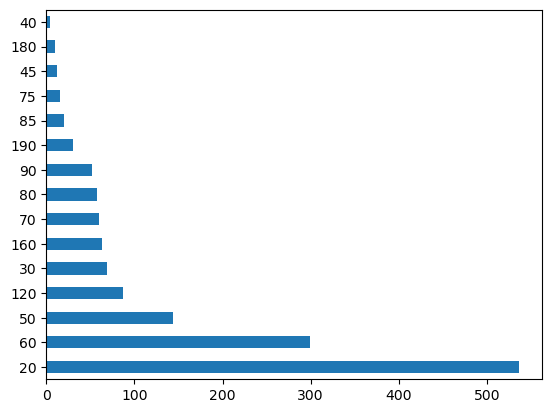

In [7]:
train.MSSubClass.value_counts().plot(kind = 'barh')

Codificacion one-hot:permite representar una variable categórica como una serie de variables binarias (0 o 1) que pueden ser interpretadas directamente por un modelo de regresión. En lugar de tratar una variable categórica como una sola variable numérica, la codificación one-hot permite que el modelo tenga en cuenta la presencia o ausencia de cada categoría como un predictor separado

In [8]:
col_tt = train.columns
df_hot_e = pd.get_dummies(train, columns=['MSSubClass'])
df_hot_e = df_hot_e.filter(['Id', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190'], axis=1)

In [9]:
encoder_dic = {}
encoder_dic['MSSubClass'] = df_hot_e

### MSZoning       
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [10]:
train.MSZoning.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSZoning
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [11]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
df = pd.get_dummies(train, columns=['MSZoning'])
df = df.filter(df.columns[-5::])
encoder_dic['MSZoning'] = df

### LotFrontage: 
Linear feet of street connected to property

In [13]:
train.LotFrontage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [14]:
train.LotFrontage.median()

69.0

In [15]:
train.LotFrontage.describe().round(2)

count    1201.00
mean       70.05
std        24.28
min        21.00
25%        59.00
50%        69.00
75%        80.00
max       313.00
Name: LotFrontage, dtype: float64

Histograma antes de la imputacion de valores nan

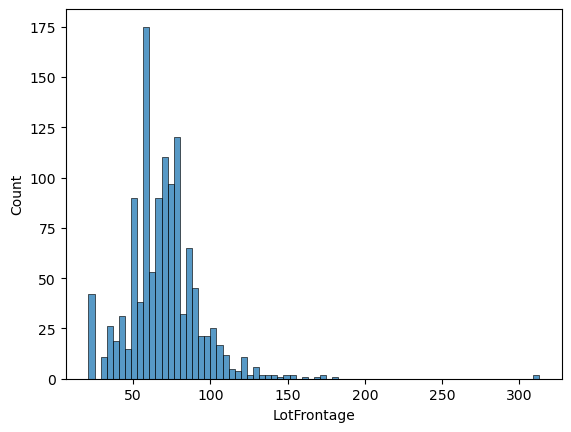

In [16]:
hist_originalLF = sns.histplot(train.LotFrontage)

<AxesSubplot: xlabel='LotFrontage', ylabel='Count'>

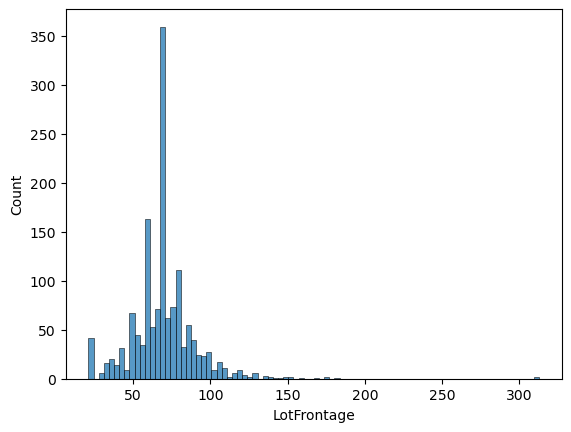

In [17]:
media = train.LotFrontage.mean()
imputacion_media = train.LotFrontage.fillna(media)
sns.histplot(imputacion_media)

Mi primera opcion fue imputar los valores faltantes con la media/mediana/moda pero sesgaba mucho la muestra, asi que opte por usar la funcion de pandas: 'interpolate', la interpolación lineal es un método simple que utiliza una línea recta para estimar los valores faltantes en un conjunto de datos. La idea es que, si se conocen dos puntos en una línea recta, se puede estimar el valor de cualquier otro punto en la línea recta utilizando la fórmula de la ecuación de una línea recta.

In [18]:
df = train.LotFrontage.interpolate()
df.isnull().sum()

0

Text(0.5, 1.0, 'Datos imputados')

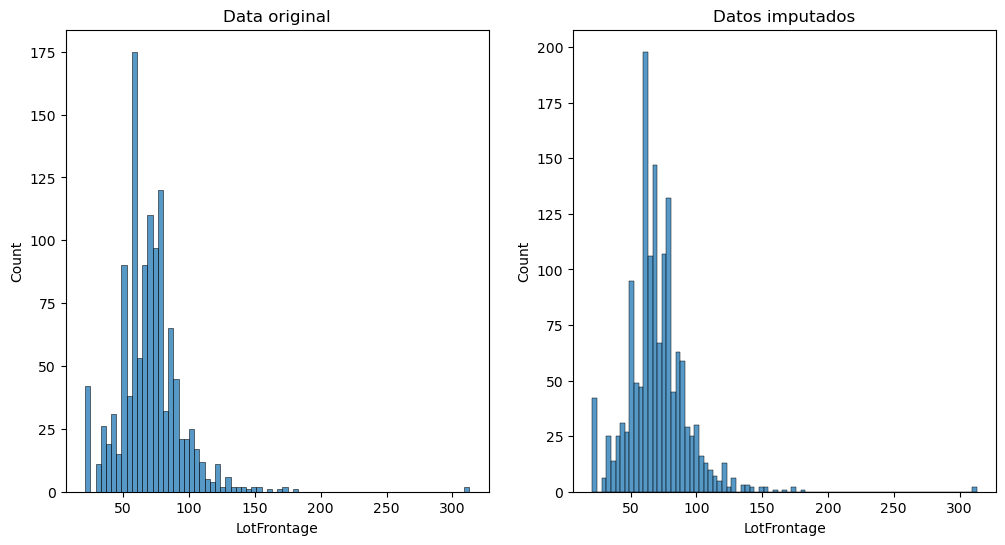

In [19]:
fig, axs = sns.mpl.pyplot.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar el primer conjunto de datos en la primera subtrama
sns.histplot(train.LotFrontage, ax=axs[0])
axs[0].set_title('Data original')

# Graficar el segundo conjunto de datos en la segunda subtrama
sns.histplot(df, ax=axs[1])
axs[1].set_title('Datos imputados')

In [20]:
col1 = df.describe().round(2)
col2 = train.LotFrontage.describe().round(2)
rdo = pd.DataFrame()
rdo['Original'] = col2
rdo['Imputados'] = col1
rdo

,Original,Imputados
count,1201.00,1460.00
mean,70.05,70.21
std,24.28,23.05
min,21.00,21.00
25%,59.00,60.00
50%,69.00,69.50
75%,80.00,80.00
max,313.00,313.00


In [21]:
train.LotFrontage = df

In [22]:
train.drop(['MSSubClass', 'MSZoning'], axis = 1, inplace = True)

### LotArea
Lot size in square feet

In [23]:
train.LotArea.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot: xlabel='LotArea', ylabel='Count'>

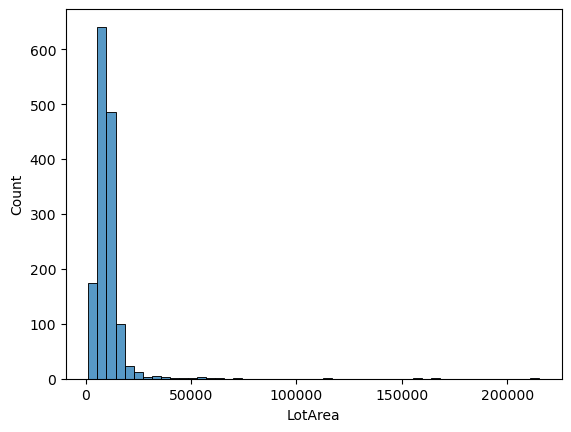

In [24]:
sns.histplot(train.LotArea, bins = 50)

### Street
Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [25]:
train.Street.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [26]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [27]:
dic_map = {'Grvl': 0,'Pave': 1}
train.Street = train['Street'].map(dic_map)

In [28]:
train.Street.value_counts()

1    1454
0       6
Name: Street, dtype: int64

### Alley
Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [29]:
train.Alley.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


In [30]:
train.drop(['Alley'], axis = 1, inplace = True)

### LotShape
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [31]:
train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [32]:
df = pd.get_dummies(train, columns=['LotShape'])
encoder_dic['LotShape'] = df.filter(df.columns[-4::])

In [33]:
train.drop(['LotShape'], axis = 1, inplace = True)

### LandContour: 
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [34]:
train.LandContour.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LandContour
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [35]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [36]:
df = pd.get_dummies(train, columns=['LandContour'])
encoder_dic['LandContour'] = df.filter(df.columns[-4::])
train.drop(['LandContour'], axis = 1, inplace = True)

###  Utilities
Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [40]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
train.drop(['Utilities'], axis = 1, inplace = True)

In [42]:
train

,Id,LotFrontage,LotArea,Street,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,80.0,9600,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,68.0,11250,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,60.0,9550,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,84.0,14260,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,85.0,13175,1,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,66.0,9042,1,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,68.0,9717,1,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
